<a href="https://colab.research.google.com/github/HEON-WOOK/Machine-Learning/blob/main/PCA_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-03-25 14:40:29--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-25 14:40:29--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-25 14:40:30--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443..

In [5]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [7]:
target = np.array([0]*100+[1]*100+[2]*100)

In [13]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


0.9966666666666667
1.494721031188965


PCA 차원축소 만들기

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [15]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# PCA 차원축소로 계산시간이 단축됨

1.0
0.029057407379150392


In [21]:
pca = PCA(n_components=0.5) # 주성분 찾기 분산 50%
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
print(pca.n_components_) # 주성분 찾기

2


In [26]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [27]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04319696426391602


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3 , random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts =True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


In [31]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio =1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows <2 else 10
  fig,axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze =False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n :
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
        axs[i,j].axis('off')
  plt.show()

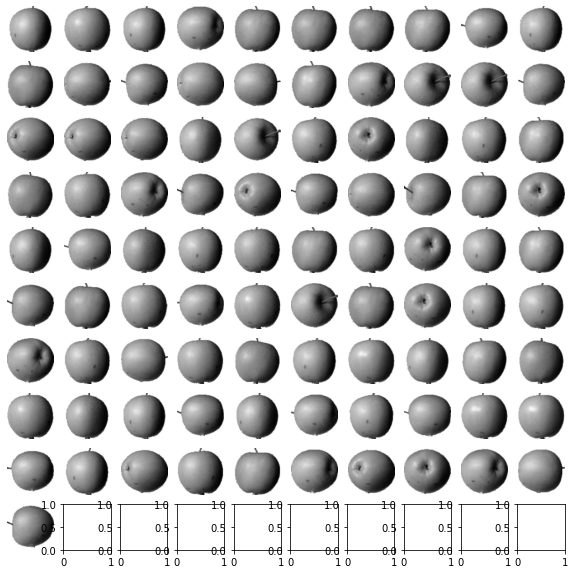

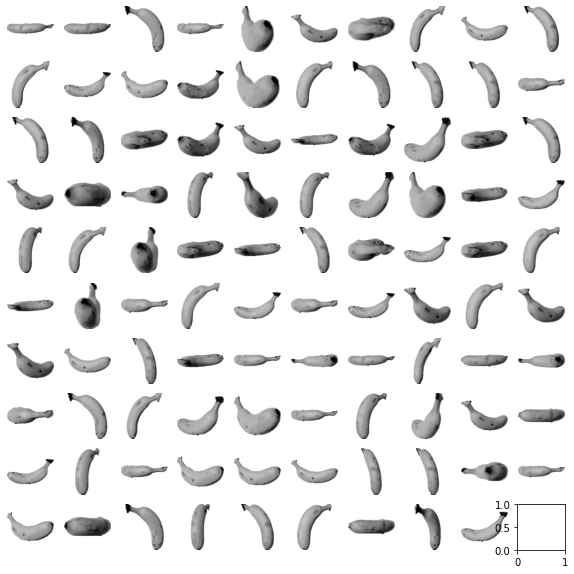

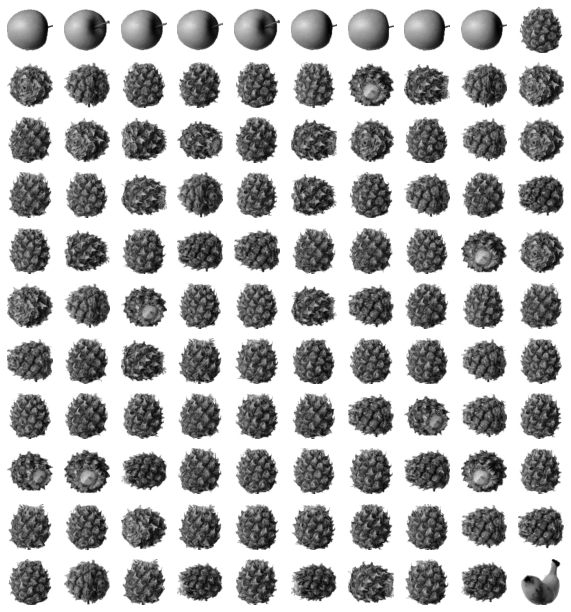

In [32]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])

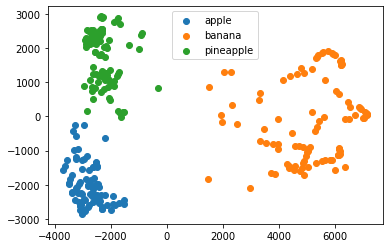

In [41]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

array([-2778.41779459, -3078.27365136])